# Exercise 2

In [76]:
import Pkg; Pkg.activate("ex2.jl")
using Plots

  Activating project at `c:\Users\colin\OneDrive-TUM\Code\Julia\MMDS_Julia\ex2.jl`

### The Lorenz System

In [77]:
# Lorenz '63 (OOP)
function f(u, p, t)
    x, y, z = u
    σ, β, ρ = p
    
    dx = σ * (y - x)
    dy = x * (ρ - z) - y
    dz = x * y - β * z
    
    return [dx, dy, dz]
end

f (generic function with 1 method)

### Initial Conditions and Parameters

In [78]:
u0 = rand(3)                # Initial conditions
tspan = (0.0, 10.0)         # Timespan of the integration
dt = 0.01                   # time step
p = [10.0, 8 / 3, 28.0];    # Parameters (optional)

3-element Vector{Float64}:
 10.0
  2.6666666666666665
 28.0

### Define the Euler Solvers

In [109]:
function Euler_simple(f, u0, p, tspan, dt)
    t = collect(tspan[1]:dt:tspan[2])
    u = -1 * ones(length(u0), length(t))
    u[:, 1] = u0
    for (i, t_) in enumerate(t[1:end-1])
        u[:, i+1] = u[:, i] + f(u[:, i], p, t_) * dt
    end
    return t, u
end


function Euler_improv(f, u0, p, tspan, dt)
    t = collect(tspan[1]:dt:tspan[2])
    u = zeros(length(u0), length(t))
    u[:, 1] = u0
    for (i, t_) in enumerate(t[1:end-1])
        u_tilde = u[:, i] + f(u[:, i], p, t_)*dt
        u[:, i+1] = u[:, i] + 0.5 * (f(u[:, i], p, t_) + f(u_tilde, p, t_)) * dt
    end
    return t, u
end

Euler_improv (generic function with 1 method)

### Run the Solvers (Lorenz '63)

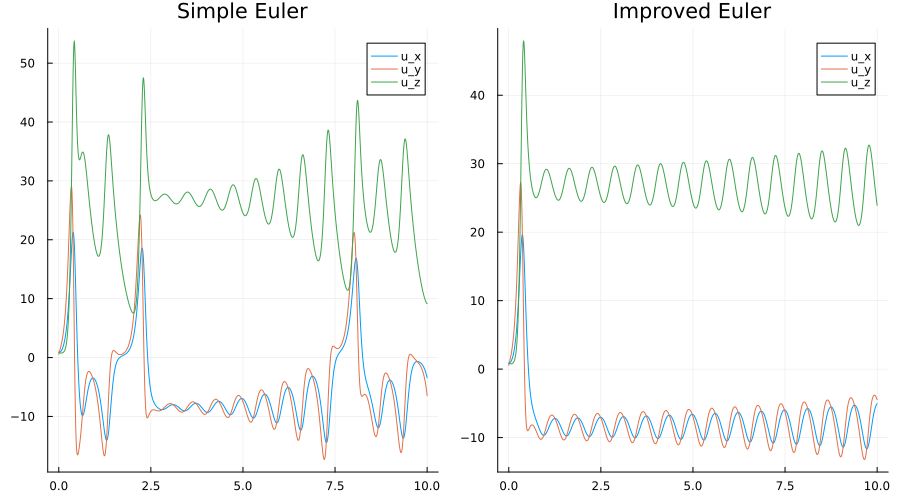

In [80]:
t_simple, u_simple = Euler_simple(f, u0, p, tspan, dt)
t_improv, u_improv = Euler_improv(f, u0, p, tspan, dt)

l = @layout [a b]
fig = plot(t_simple, u_simple', title="Simple Euler", label=["u_x" "u_y" "u_z"], subplot=1, layout=l, size=(900, 500))
plot!(fig[2], t_improv, u_improv', title="improv Euler", label=["u_x" "u_y" "u_z"], subplot=2, layout=l)


┌ Info: Saved animation to C:\Users\colin\AppData\Local\Temp\jl_IHsjQ9I9qh.gif
└ @ Plots C:\Users\colin\.julia\packages\Plots\sxUvK\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\colin\\AppData\\Local\\Temp\\jl_IHsjQ9I9qh.gif")
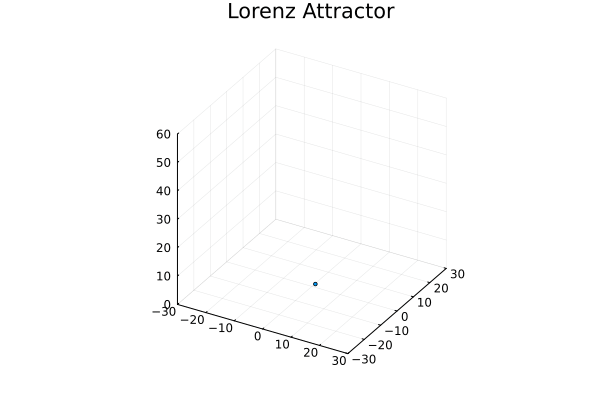

In [81]:
plt = plot3d(
    1,
    xlim = (-30, 30),
    ylim = (-30, 30),
    zlim = (0, 60),
    title = "Lorenz Attractor",
    legend = false,
    marker = 2
)

# build an animated gif by pushing new points to the plot, saving every 10th frame
@gif for (x, y, z) in eachcol(u_simple)
    push!(plt, x, y, z)
end every 10

In [82]:
N = 200

u1 = 20*rand(3, N)
u2 = 15*ones(3, N)


plt = plot3d(
    1,
    xlim = (-30, 30),
    ylim = (-30, 30),
    zlim = (0, 60),
    title = ["Some trajectory" "Other trajectory"],
    legend = false,
    marker = 2,
    layout = (1, 2)
)

@gif for i in range(1, size(u1, 2))
    push!(plt[1], u1[:, i]...)
    push!(plt[2], u2[:, i]...)
end every 10

MethodError: MethodError: no method matching push!(::Plots.Subplot{Plots.GRBackend}, ::Float64)

Closest candidates are:
  push!(::Any, ::Any, !Matched::Any)
   @ Base abstractarray.jl:3389
  push!(::Any, ::Any, !Matched::Any, !Matched::Any...)
   @ Base abstractarray.jl:3390
  push!(!Matched::StatsBase.AbstractHistogram{T, 1}, ::Real) where T
   @ StatsBase C:\Users\colin\.julia\packages\StatsBase\WLz8A\src\hist.jl:294
  ...


### Lotka-Volterra System
First, define the differential equation:

In [83]:
function lotka_volterra(u, p, t)
    h, f = u
    alpha, beta, gamma, delta = p

    dh = alpha*h - beta*h*f
    df = -gamma*f + delta*h*f

    return [dh, df]
end

lotka_volterra (generic function with 1 method)

Then, define the initial conditions and parameters of the LV-System, and additional integration settings

In [135]:
u0 = [20., 5.]
p = [1., 0.5, 1., 0.2]

dt = [0.01, 0.05, 0.1]
tspan = [0, 50];

Run the experiment for both solvers and different step sizes:

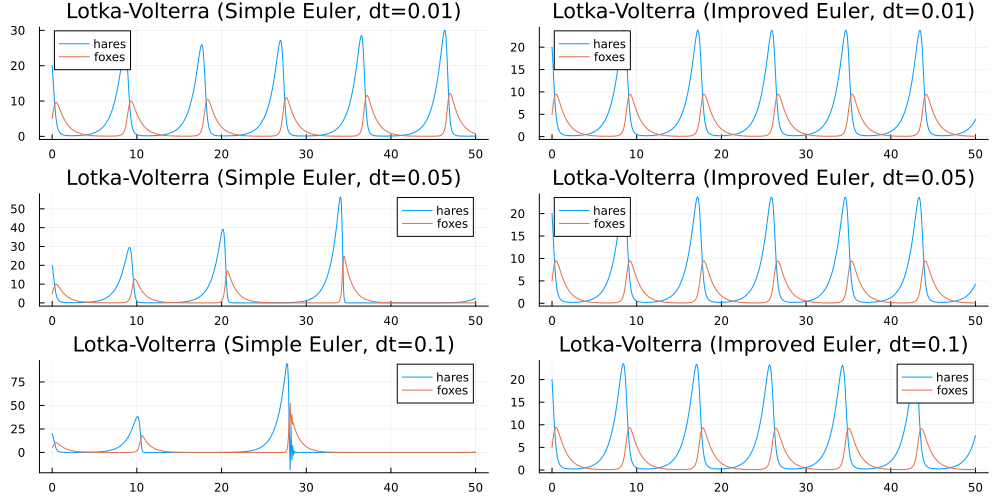

In [133]:
plt = plot(layout=(length(dt), 2), size=(1000, 500))
for (i, dt_) in enumerate(dt)
    t_simple, u_simple = Euler_simple(lotka_volterra, u0, p, tspan, dt_)
    t_improv, u_improv = Euler_improv(lotka_volterra, u0, p, tspan, dt_)
    plot!(t_simple, u_simple', subplot=(i-1)*2+1, title="Lotka-Volterra (Simple Euler, dt=$dt_)", label=["hares" "foxes"])
    plot!(t_improv, u_improv', subplot=(i-1)*2+2, title="Lotka-Volterra (Improved Euler, dt=$dt_)", label=["hares" "foxes"])
end
plt

**Observations:** 

The solution of the simple Euler already changes slightly when changing the step size from $dt=0.01$ to $dt=0.05$, while visually, no difference in solution can be seen for the improved Euler.

The effect is much stronger for $dt=0.1$, where the quality of solution of the simple Euler deteriorates dramatically, while the simple Euler solution still appears almost unchanged.